In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
data= pd.read_csv("C:/Users/dell/Desktop/DS lab -2 project/new_dff.csv")

In [4]:
data

,X.1,X,Status.text,State,retweet_count,reply_count,like_count,quote_count,Buzz,Day,...,Clout,Cognition,emotion,emo_pos,emo_neg,Positive,Negative,Total_Sentiment,Total_sentiment1,Sentiment_Type
0,0,1,"World Tourism Day, Tourism for inclusive grow...",Assam,0,1,1,0,3,weekday,...,40.06,3.23,3.23,0.00,3.23,1,-2,1,-1,Negative
1,1,2,In tune with this year's World Tourism Day the...,Assam,0,1,1,0,3,weekday,...,40.06,0.00,2.27,0.00,2.27,1,-1,0,0,Neutral
2,2,3,Kakoijana reserved forest is loca near Abhayap...,Assam,0,1,1,0,3,weekend,...,40.06,0.00,2.78,0.00,2.78,1,-2,1,-1,Negative
3,3,4,"In your next visit to Kaziranga National Park,...",Assam,0,1,3,0,5,weekday,...,90.60,4.17,2.08,0.00,2.08,1,-1,0,0,Neutral
4,4,5,Ketetong is a Singpho tribal village located o...,Assam,0,1,1,0,3,weekday,...,57.11,5.71,2.86,0.00,2.86,1,-1,0,0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23001,23001,118,Express your thoughts and get rewarded...\r\n....,Assam,4,0,14,1,26,weekday,...,98.75,8.33,16.67,8.33,8.33,1,-1,0,0,Neutral
23002,23002,119,Frustrated with this pause ??\r\n\r\nCall in y...,Assam,3,1,38,1,49,weekday,...,72.07,1.85,3.70,0.00,3.70,4,-1,3,3,Positive
23003,23003,120,Happy World Tourism Day 2020...\r\n\r\nThis ye...,Assam,9,1,33,1,62,weekend,...,40.06,4.00,8.00,6.00,2.00,1,-1,0,0,Neutral
23004,23004,121,Congratulations to all the winners of Awesome ...,Assam,1,3,15,0,24,weekend,...,91.33,14.29,14.29,10.71,3.57,1,-1,0,0,Neutral


In [6]:
tweets_string = " ".join(data["Status.text"].tolist())
#Note that jupyter called Status text as Status.text

In [7]:
#Stemming
# prompt: How to remove all urls, special characters and hashtags from tweets_string

import re

tweets_string = re.sub(r'http\S+', ' ', tweets_string)  # remove URLs
tweets_string = re.sub(r'[^A-Za-z0-9]+', ' ', tweets_string)  # remove special characters
tweets_string = re.sub(r'#', '', tweets_string)  # remove hashtags
tweets_string = re.sub(r'\d+', '',tweets_string)
unwanted_words = ["a", "and", "the", "of", "in", "to", "on", "for", "at", "with", "by", "from", "up", "down", "left", "right", "back", "forth", "over", "under", "around", "through", "out", "into", "onto", "off", "above", "below", "between", "among", "past", "around", "near", "far", "here", "there", "everywhere", "anywhere", "nowhere"]

# Remove unwanted words from the tweets_string
for word in unwanted_words:
  tweets_string = tweets_string.replace(" " + word + " ", " ")



In [8]:

from collections import Counter
# Create a dictionary of word frequencies
word_counts = Counter(tweets_string.split())

# Create a DataFrame of word counts
df = pd.DataFrame.from_dict(word_counts, orient="index", columns=["Count"])

# Print the DataFrame
print(df)


               Count
World            482
Tourism         2932
Day              741
inclusive         22
growth            36
...              ...
Jiya               1
Bharali            1
FeelTheShakti      1
Ambubasi           1
BimalBorahbjp      1

[45063 rows x 1 columns]


In [9]:
#Sentiment analysis
import pandas as pd
import numpy as np
import nltk
import re
import string
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [10]:
#describing the data
data.describe()

,X.1,X,retweet_count,reply_count,like_count,quote_count,Buzz,Followers,WC,Clout,Cognition,emotion,emo_pos,emo_neg,Positive,Negative,Total_Sentiment,Total_sentiment1
count,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,2.300600e+04,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000
mean,11502.500000,828.641833,18.857168,3.595062,139.501304,1.468660,203.262931,5.082265e+05,38.723420,63.853962,4.705857,4.433875,1.091667,3.258420,1.269799,-1.056377,0.326176,0.213423
std,6641.404482,776.896316,61.300045,32.241142,537.268359,17.794031,730.136030,5.960315e+05,12.588226,25.410441,4.318090,2.664032,2.008155,1.660668,0.656546,0.283570,0.770302,0.655411
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.164000e+03,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.000000,-4.000000
25%,5751.250000,260.000000,4.000000,0.000000,27.000000,0.000000,42.000000,9.132500e+04,31.000000,40.060000,1.850000,2.440000,0.000000,2.170000,1.000000,-1.000000,0.000000,0.000000
50%,11502.500000,592.000000,9.000000,1.000000,63.000000,1.000000,96.000000,1.901970e+05,40.000000,65.160000,4.000000,4.000000,0.000000,2.700000,1.000000,-1.000000,0.000000,0.000000
75%,17253.750000,1135.000000,21.000000,3.000000,137.000000,1.000000,208.000000,6.507710e+05,46.000000,88.150000,6.980000,5.560000,2.130000,4.000000,1.000000,-1.000000,0.000000,0.000000
max,23005.000000,3685.000000,3519.000000,4580.000000,38244.000000,2546.000000,48864.000000,1.972674e+06,205.000000,99.000000,50.000000,30.000000,23.530000,20.000000,5.000000,-1.000000,6.000000,4.000000


In [11]:
#making subdata by taking status.text and sentiment
df = pd.DataFrame(data)

# Selecting specific columns
selected_columns = ['Status.text','Sentiment_Type']  # Columns you want to select
sub_data = df[selected_columns]

print(sub_data)

                                             Status.text Sentiment_Type
0      World Tourism Day,  Tourism for inclusive grow...       Negative
1      In tune with this year's World Tourism Day the...        Neutral
2      Kakoijana reserved forest is loca near Abhayap...       Negative
3      In your next visit to Kaziranga National Park,...        Neutral
4      Ketetong is a Singpho tribal village located o...        Neutral
...                                                  ...            ...
23001  Express your thoughts and get rewarded...\r\n....        Neutral
23002  Frustrated with this pause ??\r\n\r\nCall in y...       Positive
23003  Happy World Tourism Day 2020...\r\n\r\nThis ye...        Neutral
23004  Congratulations to all the winners of Awesome ...        Neutral
23005  #FeelTheShakti\r\nSeek blessings from Mother G...        Neutral

[23006 rows x 2 columns]


In [12]:
sub_data.describe()

,Status.text,Sentiment_Type
count,23006,23006
unique,23001,3
top,Who’s your favourite? \r\n.\r\n#IPL2020,Neutral
freq,2,18919


<AxesSubplot:xlabel='Sentiment_Type', ylabel='count'>

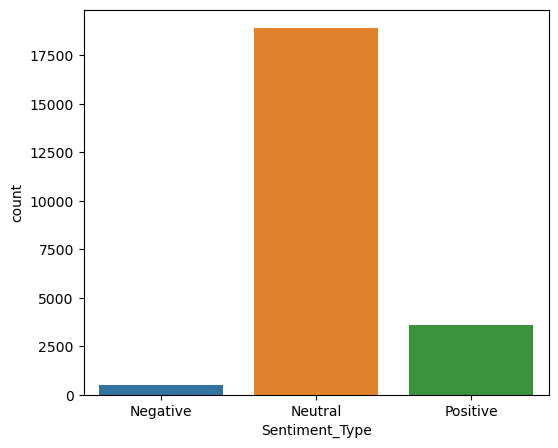

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#plotting the labels
plt.figure(figsize=(6,5))
sns.countplot(x='Sentiment_Type', data= sub_data)

In [14]:
#renaming subdata as tweets
tweets= sub_data
#separating the text and the sentiment labels
text= tweets.iloc[:,0].values
sentiment= tweets.iloc[:,1].values

In [15]:
#processing the data
text_processed = []
for i in range (0,len(text)):
    #removing the special characters
    text_extract = re.sub(r'\W',' ',str(text[i]))
    
    #removing single words
    text_extract = re.sub(r'\s+[a-zA-Z]\s+',' ', text_extract)
    
    #removing single characters from the beginning
    text_extract = re.sub(r'\^[a_zA-Z]\s+',' ', text_extract)
    
    #removing white space
    text_extract = re.sub(r'\s+',' ',text_extract, flags= re.I)
    
    #converting the text to lower case
    text_extract = text_extract.lower()
    
    text_processed.append(text_extract)

In [16]:
text_processed

['world tourism day tourism for inclusive growth in conjunction with world tourism day assam tourism plans to kickstart the tourism revival in the state post covid https co nkfctmvdwt',
 'in tune with this year world tourism day theme tourism for inclusive growth five day workshop on capacity building was organised for the first time by the directorate of tourism assam for the jeep safari drivers at kaziranga https co fvbknucab1',
 'kakoijana reserved forest is loca near abhayapuri in bongaigaon district of assam this forest was constituted in 1966 as reserved forest it is famous for consisting 60 endangered golden langurs https co 2tmrygqtjf',
 'in your next visit to kaziranga national park try to extend your stay for trip to karbi villages nearby the karbis have been residing there for ages and these villages are said to be repositories of unique culture with roots in animism https co kragjz6nbr',
 'ketetong is singpho tribal village located on the banks of the buri dehing river near

In [17]:
#stemming and bag of words
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk.stem
stemming = nltk.stem.SnowballStemmer('english')

class Stemming(TfidfVectorizer):
    def build_analyzer(self):
        textanalyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda tweetdoc: (stemming.stem(i) for i in textanalyzer(tweetdoc))

textvectorizer = Stemming(max_features=10000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
text_processed = textvectorizer.fit_transform(text_processed). toarray()

# Get the feature names from the fitted vectorizer
#Total number of words
words = textvectorizer.get_feature_names()
print("Total number of words:", len(words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total number of words: 6415


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
NBX_train, NBX_test, NBY_train, NBY_test = train_test_split (text_processed, sentiment, test_size = 0.25, random_state=42)

In [19]:
#Naive Bayes classifier
from sklearn.naive_bayes import BernoulliNB
NBC_sentiment = BernoulliNB()
NBC_sentiment.fit(NBX_train, NBY_train)

BernoulliNB()

In [20]:
#Predicting on test data
test_sentiment_predicted = NBC_sentiment.predict(NBX_test)

In [28]:
#checking for accuracy
from sklearn import metrics
print(metrics.classification_report(NBY_test, test_sentiment_predicted))

              precision    recall  f1-score   support

    Negative       0.20      0.09      0.12       124
     Neutral       0.89      0.90      0.89      4760
    Positive       0.46      0.46      0.46       868

    accuracy                           0.81      5752
   macro avg       0.51      0.48      0.49      5752
weighted avg       0.81      0.81      0.81      5752



In [29]:
# The naive bayes model can predict neg at 45% , neutral at 88% and positive at 46% and a average of 60% of sentiments can be predicted

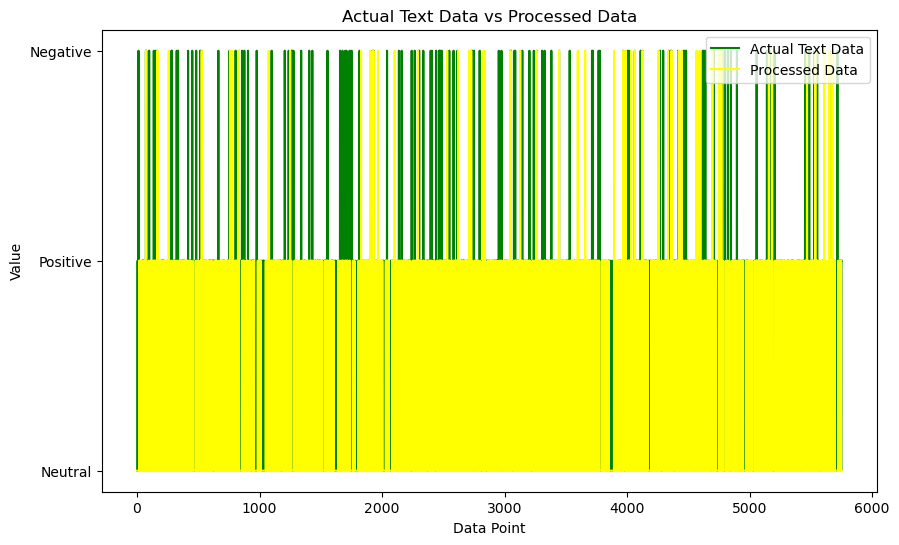

In [24]:
#import matplotlib.pyplot as plt

# Assuming you have two datasets: 'text_data' and 'processed_data'
# Replace 'text_data' and 'processed_data' with your actual data
text_data = NBY_test  # List of original text data
processed_data = test_sentiment_predicted  # List of processed data from the Naive Bayes model

# Plot the actual text data vs processed data
plt.figure(figsize=(10, 6))
plt.plot(text_data, label='Actual Text Data', color='green')
plt.plot(processed_data, label='Processed Data', color='yellow')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual Text Data vs Processed Data')
plt.legend()
plt.grid(False)
plt.show()


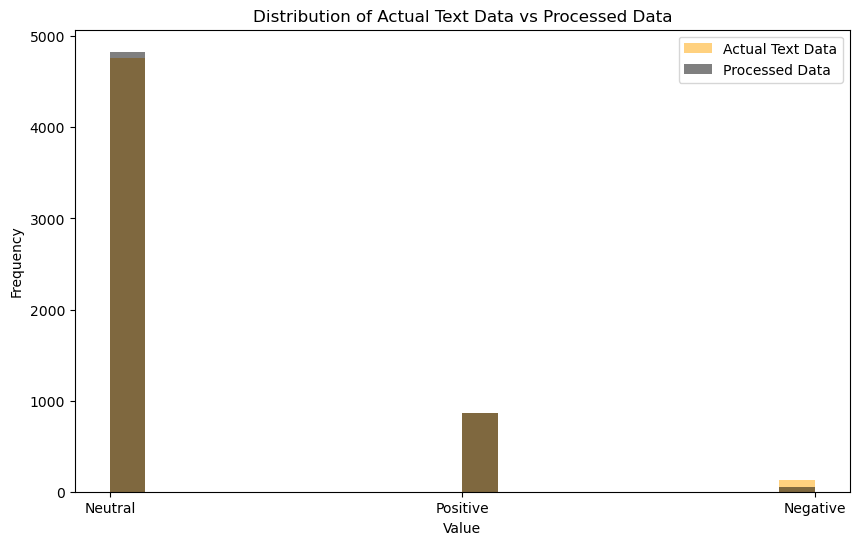

In [27]:
import matplotlib.pyplot as plt

# Assuming you have two datasets: 'text_data' and 'processed_data'
# Replace 'text_data' and 'processed_data' with your actual data
# List of processed data from the Naive Bayes model

# Plot the actual text data vs processed data
plt.figure(figsize=(10, 6))

# Plot histogram for actual text data
plt.hist(text_data, bins=20, alpha=0.5, color='orange', label='Actual Text Data')

# Plot histogram for processed data
plt.hist(processed_data, bins=20, alpha=0.5, color='black', label='Processed Data')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Text Data vs Processed Data')
plt.legend()
plt.grid(False)
plt.show()
